In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from numpy.linalg import eig
from sklearn.decomposition import PCA
import cmath
import warnings
# warnings.filterwarnings('ignore')

# Data

In [110]:
X_test = np.loadtxt("data/pca/X_test.csv", delimiter=",", dtype=float)
X_train = np.loadtxt("data/pca/X_train.csv", delimiter=",", dtype=float)
y_test = np.loadtxt("data/pca/y_test.csv", delimiter=",", dtype=float)
y_train = np.loadtxt("data/pca/y_train.csv", delimiter=",", dtype=float)


In [111]:
print("unique values in y_train: ", np.unique(y_test))
print("X_test shape: ", X_train.shape)
print("X_test", X_train[-1])

unique values in y_train:  [0. 1. 2. 3. 4.]
X_test shape:  (33724, 16)
X_test [-0.74411947 -0.60770208 -0.68559778  1.3617996   1.7190119   0.37523782
 -0.57969451 -0.52327877  0.35072553  1.47995245 -0.18427706 -0.78223807
  1.75510848 -0.69236201 -0.63593078  0.19805355]


# Principal component analysis

In [112]:
def eigenValues(X):
    eigenValues = []
    eigenVectors = []
    for i in range(len(X)):
        w,v = eig(X[i].reshape((4, 4)))
        w = w.real #remove complex part from computational error
        eigenValues.append(w)
        eigenVectors.append(v)
    return np.array(eigenValues), np.array(eigenVectors)

eig_train, vec_train = eigenValues(X_train)

In [113]:
y_0 = np.where(y_train == 0)
y_1 = np.where(y_train == 1)
y_2 = np.where(y_train == 2)
y_3 = np.where(y_train == 3)
y_4 = np.where(y_train == 4)

x_0 = eig_train[y_0]
x_1 = eig_train[y_1]
x_2 = eig_train[y_2]
x_3 = eig_train[y_3]
x_4 = eig_train[y_4]


In [114]:
def scatterPlot(labelsize, index):
    plt.scatter([x_0[i][0+index] for i in range(len(x_0))], 
                [x_0[i][1+index] for i in range(len(x_0))],
                color='red', label='0',
                sizes=[labelsize for n in range(len(x_0))])
    plt.scatter([x_1[i][0+index] for i in range(len(x_1))], 
                [x_1[i][1+index] for i in range(len(x_1))],
                color='blue', label='1',
                sizes=[labelsize for n in range(len(x_0))])
    plt.scatter([x_2[i][0+index] for i in range(len(x_2))], 
                [x_2[i][1+index] for i in range(len(x_2))],
                color='green', label='2',
                sizes=[labelsize for n in range(len(x_0))])
    plt.scatter([x_3[i][0+index] for i in range(len(x_3))], 
                [x_3[i][1+index] for i in range(len(x_3))],
                color='black', label='3',
                sizes=[labelsize for n in range(len(x_0))])
    plt.scatter([x_4[i][0+index] for i in range(len(x_4))], 
                [x_4[i][1+index] for i in range(len(x_4))],
                color='orange', label='3', 
                sizes=[labelsize for n in range(len(x_0))])
    plt.show()

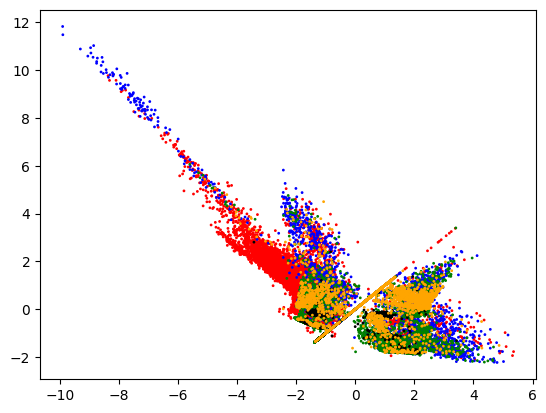

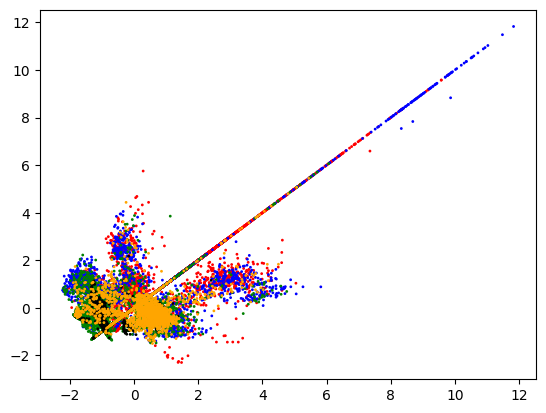

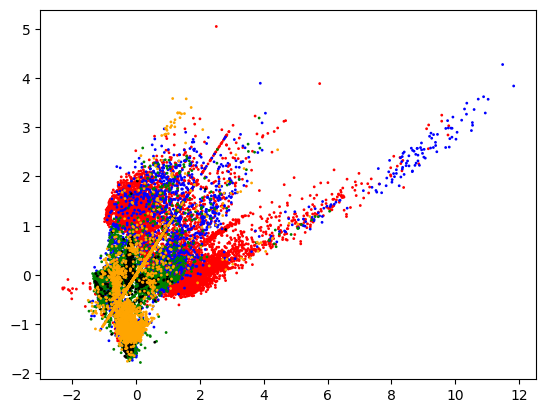

In [115]:
scatterPlot(1, 0)
scatterPlot(1, 1)
scatterPlot(1, 2)

In [116]:
pca = PCA(n_components=4)
pca.fit(eig_train)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
#When we use 3 components, we can explain more than 90% of the variance in the data

[0.65841092 0.19722922 0.09081681 0.05354304]
[0.65841092 0.85564014 0.94645696 1.        ]


# K-mean cluster

In [117]:
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42, init='random').fit(eig_train)
warnings.filterwarnings('default')

centroid = kmeans.cluster_centers_
print(centroid)

[[-5.8462083   6.42807534  6.41795519  1.59611313]
 [ 1.64866944 -0.38849318 -0.22715773 -0.59935494]
 [-1.23405505 -0.13484019  0.02853545  1.18955514]
 [-2.22857196  1.65507484  1.453434    0.2016762 ]
 [-1.34201058 -0.61991104 -0.23808475 -0.01956303]]


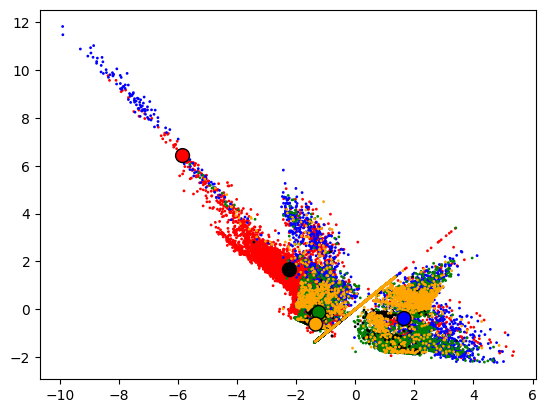

In [118]:
labelsize = 1
center_size = 100

schema = 2
if schema == 1: colors = ['cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue']
if schema == 2: colors = ['red', 'blue', 'green', 'black', 'orange']

plt.scatter([x_0[i][0] for i in range(len(x_0))], 
            [x_0[i][1] for i in range(len(x_0))],
            color=colors[0], label='0',
            sizes=[labelsize for n in range(len(x_0))])
plt.scatter([x_1[i][0] for i in range(len(x_1))], 
            [x_1[i][1] for i in range(len(x_1))],
            color=colors[1], label='1',
            sizes=[labelsize for n in range(len(x_0))])
plt.scatter([x_2[i][0] for i in range(len(x_2))], 
            [x_2[i][1] for i in range(len(x_2))],
            color=colors[2], label='2',
            sizes=[labelsize for n in range(len(x_0))])
plt.scatter([x_3[i][0] for i in range(len(x_3))], 
            [x_3[i][1] for i in range(len(x_3))],
            color=colors[3], label='3',
            sizes=[labelsize for n in range(len(x_0))])
plt.scatter([x_4[i][0] for i in range(len(x_4))], 
            [x_4[i][1] for i in range(len(x_4))],
            color=colors[4], label='3', 
            sizes=[labelsize for n in range(len(x_0))])

plt.scatter([centroid[i][0] for i in range(len(centroid))], 
            [centroid[i][1] for i in range(len(centroid))],
            color=colors, edgecolors='black', label='c', 
            sizes=[center_size for n in range(len(centroid))])
plt.show()

# K-means++

In [119]:
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++').fit(eig_train)
warnings.filterwarnings('default')

centroid = kmeans.cluster_centers_
print(centroid)

[[-5.8462083   6.42807534  6.41795519  1.59611313]
 [-1.34201058 -0.61991104 -0.23808475 -0.01956303]
 [ 1.64866944 -0.38849318 -0.22715773 -0.59935494]
 [-2.22857196  1.65507484  1.453434    0.2016762 ]
 [-1.23405505 -0.13484019  0.02853545  1.18955514]]


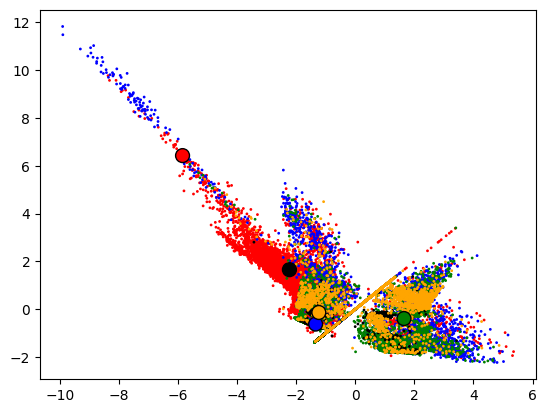

In [120]:
plt.scatter([x_0[i][0] for i in range(len(x_0))], 
            [x_0[i][1] for i in range(len(x_0))],
            color=colors[0], label='0',
            sizes=[labelsize for n in range(len(x_0))])
plt.scatter([x_1[i][0] for i in range(len(x_1))], 
            [x_1[i][1] for i in range(len(x_1))],
            color=colors[1], label='1',
            sizes=[labelsize for n in range(len(x_0))])
plt.scatter([x_2[i][0] for i in range(len(x_2))], 
            [x_2[i][1] for i in range(len(x_2))],
            color=colors[2], label='2',
            sizes=[labelsize for n in range(len(x_0))])
plt.scatter([x_3[i][0] for i in range(len(x_3))], 
            [x_3[i][1] for i in range(len(x_3))],
            color=colors[3], label='3',
            sizes=[labelsize for n in range(len(x_0))])
plt.scatter([x_4[i][0] for i in range(len(x_4))], 
            [x_4[i][1] for i in range(len(x_4))],
            color=colors[4], label='3', 
            sizes=[labelsize for n in range(len(x_0))])

plt.scatter([centroid[i][0] for i in range(len(centroid))], 
            [centroid[i][1] for i in range(len(centroid))],
            color=colors, edgecolors='black', label='c', 
            sizes=[center_size for n in range(len(centroid))])